# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 1:
In this question we train a linearly separable data with multi layer perceptron

### import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns

### check GPU availability

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### create data

In [3]:
x, y = datasets.make_blobs(n_samples=200, centers=[(-1, -1), (1, 1)], cluster_std=0.5)
# convert to the torch tensor
x = torch.tensor(x, dtype=torch.float32, device=device)
y = torch.tensor(y, dtype=torch.float32, device=device)

### plot data

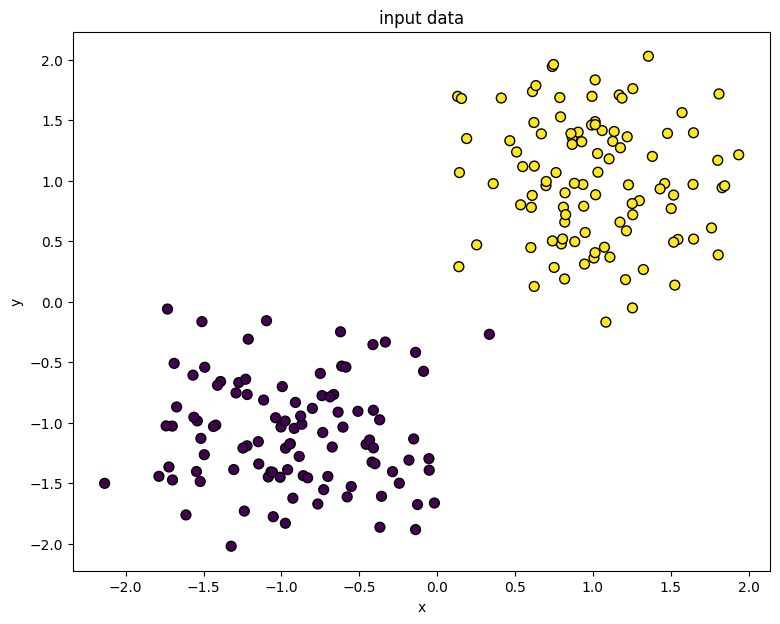

In [4]:
plt.figure(figsize=(9, 7))
plt.scatter(x[:, 0].cpu().numpy(), x[:, 1].cpu().numpy(), c=y.cpu().numpy(), edgecolors='k', marker='o', s=50)
plt.title("input data")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### define MLP class with this structure:
* 4 layer neurons (input + hidden1 + hidden2 + output)
* input layer neurons: 2
* hidden1 layer neurons: 10
* hidden2 layer neurons: 10
* output layer neurons: 2
* activation function in each layer: sigmoid

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(2, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)

    def forward(self, x):
        x = F.sigmoid(self.hidden1(x))
        x = F.sigmoid(self.hidden2(x))
        x = self.output(x)
        return F.softmax(x, dim=1)